<a href="https://colab.research.google.com/github/Nicolasalan/vault/blob/main/TD3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib

# **Exemplo da Função do Lidar**

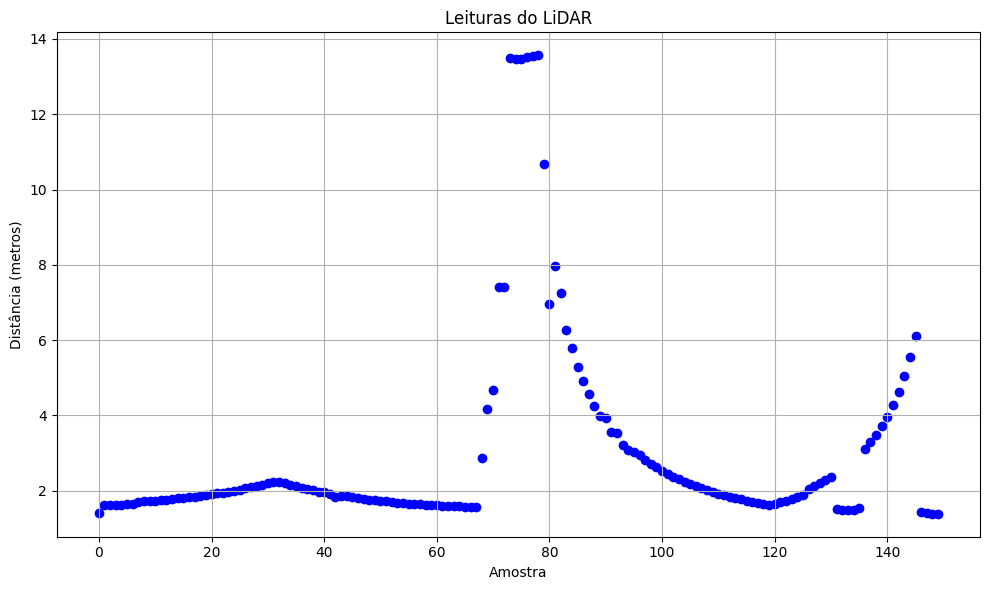

In [62]:
import numpy as np
import matplotlib.pyplot as plt

class LidarSensor:
    def __init__(self, max_range=10.0):
        self.max_range = max_range
        self.scan_data = None

    def process_scan(self, scan):
        scan_range = []
        for i in range(len(scan)):
            if scan[i] == float('inf'):
                scan_range.append(self.max_range)
            elif np.isnan(scan[i]):
                scan_range.append(0)
            else:
                scan_range.append(scan[i])

        self.scan_data = np.array(scan_range)

if __name__ == "__main__":
    # Exemplo de dado do lidar
    scan = [1.40199554, 1.60912216, 1.61471009, 1.6209532, 1.627864, 1.63545573,
            1.64374459, 1.7048229, 1.71486449, 1.72568238, 1.73730004, 1.74974227,
            1.76303685, 1.77721334, 1.79230428, 1.80834436, 1.82537198, 1.84342813,
            1.86255765, 1.8828088, 1.90423501, 1.92689204, 1.95084333, 1.97615516,
            2.00290084, 2.03116107, 2.06102157, 2.0925777, 2.12593293, 2.161201,
            2.1985054, 2.23798323, 2.23679996, 2.19318676, 2.15204215, 2.11319757,
            2.07650304, 2.04182243, 2.00902891, 1.9780091, 1.97362149, 1.9208858,
            1.83375609, 1.86972356, 1.84618092, 1.82390666, 1.80283761, 1.78291857,
            1.76409471, 1.74631965, 1.72954786, 1.71373725, 1.69885135, 1.68485391,
            1.67171431, 1.65940094, 1.64788854, 1.63714981, 1.62716186, 1.61790514,
            1.60935891, 1.60150588, 1.59433031, 1.58781755, 1.58195436, 1.57673013,
            1.57213259, 1.56815553, 2.86658835, 4.17488813, 4.68163204, 7.41342402,
            7.40879059, 13.50699139, 13.45877552, 13.46566105, 13.52773762, 13.54493904,
            13.56733227, 10.67812157, 6.9712891, 7.97131395, 7.26442909, 6.27183151,
            5.78773785, 5.297194, 4.90160942, 4.55540562, 4.25638628, 3.99562502,
            3.9215436, 3.5702312, 3.52142835, 3.21958733, 3.07313967, 3.02650595,
            2.93608308, 2.8213985, 2.71632695, 2.61975694, 2.53074384, 2.44847775,
            2.37226176, 2.30149245, 2.23564649, 2.17426372, 2.11694193, 2.0633266,
            2.01310396, 1.96599472, 1.9217515, 1.88015223, 1.84099817, 1.804111,
            1.76933062, 1.73651075, 1.70552051, 1.67624104, 1.64856386, 1.62239015,
            1.64453673, 1.68725729, 1.73293197, 1.78184164, 1.83430707, 1.89069331,
            2.04831791, 2.1171186,  2.19155931, 2.27231956, 2.36018777, 1.51011825,
            1.4965167, 1.48371518, 1.47758424, 1.55210793, 3.10324192, 3.28008509,
            3.47970223, 3.70668197, 3.96694851, 4.26826477, 4.62101316, 5.03939867,
            5.54339314, 6.10359621, 1.43871272, 1.40497327, 1.39061165, 1.38594687]

    # Criar objeto do sensor LiDAR
    lidar = LidarSensor(max_range=10.0)

    # Processar os dados do LiDAR
    lidar.process_scan(scan)

    # Plotar o gráfico das leituras do LiDAR em pontos
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(lidar.scan_data)), lidar.scan_data, marker='o', color='b')
    plt.xlabel('Amostra')
    plt.ylabel('Distância (metros)')
    plt.title('Leituras do LiDAR')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# **Exemplo da Função do Calculo do Angulo**

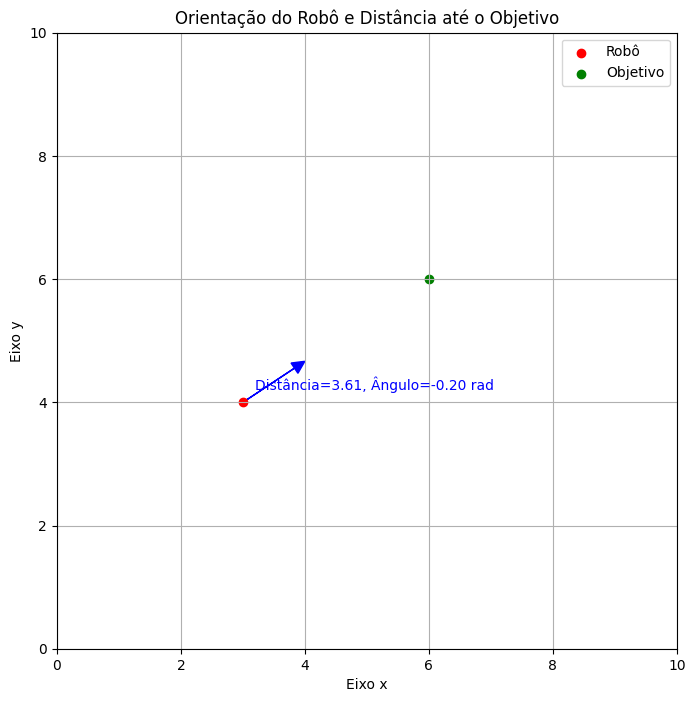

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Posição do robô (exemplo)
odom_x, odom_y = 3, 4

# Posição do objetivo (exemplo)
goal_x, goal_y = 6, 6 # quadrante 1: 6, 6; quadrante 2: 2, 6; quadrante 3: 2, 2; quadrante 4: 6, 2;

# Calcular distância até o objetivo
distance = np.linalg.norm([odom_x - goal_x, odom_y - goal_y])

delta_x = goal_x - odom_x
delta_y = goal_y - odom_y

# Calcular ângulo entre a orientação do robô e a direção para o objetivo
angle = np.arctan2(delta_y, delta_x)
theta = angle - np.pi / 4

# Criar o gráfico com a seta representando a orientação do robô e a distância até o objetivo
plt.figure(figsize=(8, 8))
plt.arrow(odom_x, odom_y, np.cos(angle), np.sin(angle), head_width=0.2, head_length=0.2, fc='blue', ec='blue')
plt.text(odom_x + 0.2, odom_y + 0.2, f'Distância={distance:.2f}, Ângulo={theta:.2f} rad', color='blue')
plt.scatter(odom_x, odom_y, color='red', label='Robô')
plt.scatter(goal_x, goal_y, color='green', label='Objetivo')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.title('Orientação do Robô e Distância até o Objetivo')
plt.legend()
plt.grid(True)
plt.xlim(0, 10)  # Limites do eixo x de 0 a 10
plt.ylim(0, 10)  # Limites do eixo y de 0 a 10
plt.show()
